equations Number: 3
coefficients:
4 -1 -1
-2 6 1
-1 1 7
constants:
3
9
-6
Iteration 1: x = 0.017857142857142856  y = 0.25  z = -1.0892857142857142  total error = 1.357142857142857
Iteration 2: x = 0.03879676870748299  y = 0.2659438775510204  z = -1.0842899659863945  total error = 0.04187925170068023
Iteration 3: x = 0.038802462949465495  y = 0.2660742124230645  z = -1.0844146066164562  total error = 0.000260669744088296
Iteration 4: x = 0.0388054644778121  y = 0.2660772478457086  z = -1.0844146405107538  total error = 6.070845288266846e-06


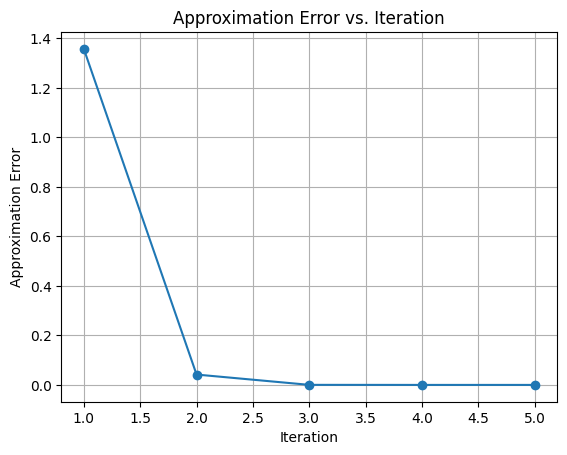

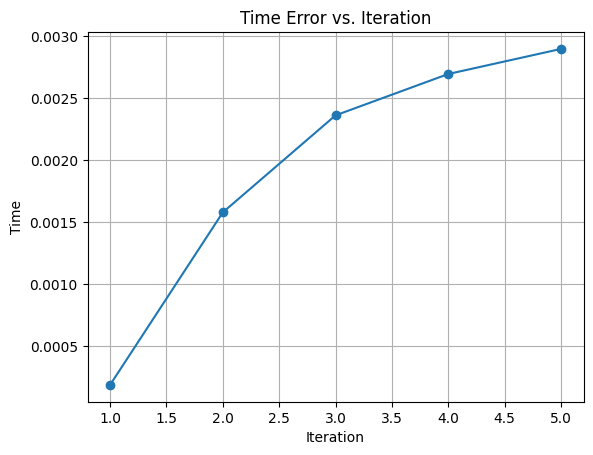

Value of x(k) for each iteration:  [ 0.75        1.5        -0.85714286]
Value of x(k) for each iteration:  [ 0.91071429  1.89285714 -0.96428571]
Value of x(k) for each iteration:  [ 0.98214286  1.96428571 -0.99744898]
Value of x(k) for each iteration:  [ 0.99170918  1.99362245 -0.99744898]
Value of x(k) for each iteration:  [ 0.99904337  1.99681122 -1.00027332]
Value of x(k) for each iteration:  [ 0.99913448  1.99972668 -0.99968112]
Value of x(k) for each iteration:  [ 1.00001139  1.99965835 -1.0000846 ]
Value of x(k) for each iteration:  [ 0.99989344  2.0000179  -0.99994957]
Value of x(k) for each iteration:  [ 1.00001708  1.99995607 -1.00001778]
Value of x(k) for each iteration:  [ 0.99998457  2.00000866 -0.99999128]
Value of x(k) for each iteration:  [ 1.00000434  1.99999341 -1.00000344]
Value of x(k) for each iteration:  [ 0.99999749  2.00000202 -0.99999844]
Value of x(k) for each iteration:  [ 1.0000009   1.9999989  -1.00000065]
Value of x(k) for each iteration:  [ 0.99999956  2.

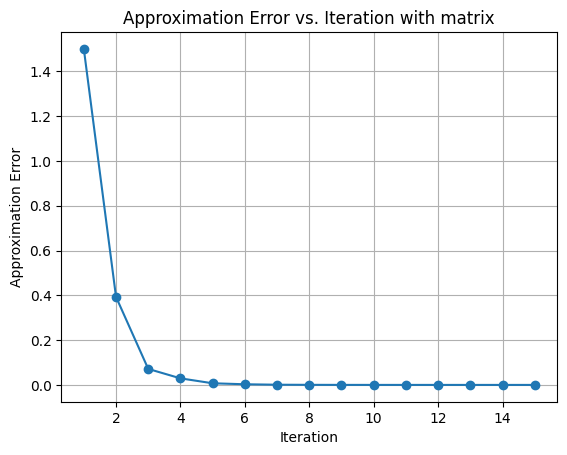

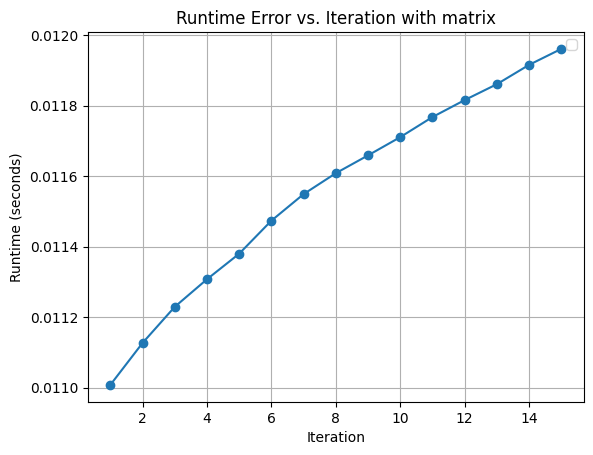

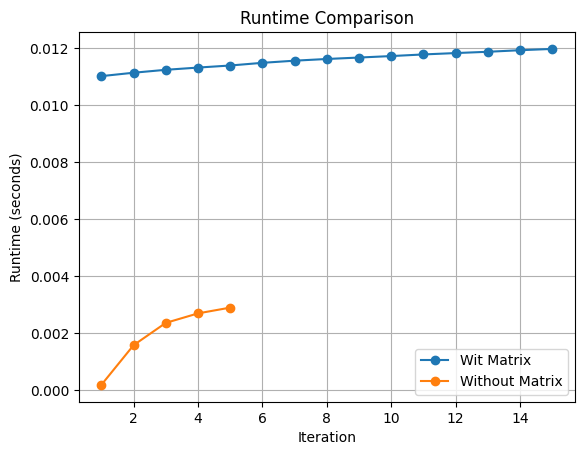

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time


def jacobi_without_matrix():
    x = np.zeros(n_eq)
    num_iterations = 20

    iteration_list = []
    appx_error_list = []
    time_list = []
    start_time = time.time()

    for iteration in range(num_iterations):
        new_x = np.zeros(n_eq)
        q=0

        for i in range(n_eq):
            new_x[i] = (b[i] - np.dot(A[i, :i], new_x[:i]) )
            new_x-=np.dot(A[i, i+1:], x[i+1:])
            new_x/= A[i, i]

        errors = np.abs(new_x - x)
        x = new_x.copy()

        total_error = np.sum(errors)
        appx_error_list.append(total_error)
        iteration_list.append(iteration + 1)
        elapsed_time = time.time() - start_time
        time_list.append(elapsed_time)

        if total_error <= 10 ** -6:
            break

        print(
            f"Iteration {iteration + 1}: x = {x[0]}  y = {x[1]}  z = {x[2]}  total error = {total_error}")

    plt.plot(iteration_list, appx_error_list, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Approximation Error')
    plt.title('Approximation Error vs. Iteration')
    plt.grid()
    plt.show()

    plt.plot(iteration_list, time_list, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Time')
    plt.title('Time Error vs. Iteration')
    plt.grid()
    plt.show()

    return iteration_list, time_list


def jacobi_with_matrix(A, b, x0, tol=1e-6, max_iter=100):
    n_eq = len(b)
    x = x0.copy()
    error_list = []
    runtime_list = []
    elapsed_time = 0
    D = np.diag(np.diag(A))
    L = -np.tril(A, k=-1)
    U = -np.triu(A, k=1)

    for _ in range(max_iter):
        start_time = time.time()
        x_new = np.linalg.inv(D).dot(b + L.dot(x) + U.dot(x))
        error = np.linalg.norm(x_new - x, ord=np.inf)
        elapsed_time += time.time() - start_time
        error_list.append(error)
        runtime_list.append(elapsed_time)

        if error < tol:
            break
        print("Value of x(k) for each iteration: ", x_new)
        x = x_new
    return x, error_list, runtime_list


n_eq = int(input("equations Number: "))

A = np.zeros((n_eq, n_eq))
b = np.zeros(n_eq)

print("coefficients:")
for i in range(n_eq):
    row = list(map(float, input().split()))
    A[i, :] = row

print("constants:")
for i in range(n_eq):
    b[i] = float(input())

xx, yy = jacobi_without_matrix()

x0 = np.zeros(n_eq)
tolerance = 1e-6
max_iterations = 100

solution, errors, runtimes = jacobi_with_matrix(
    A, b, x0, tol=tolerance, max_iter=max_iterations)

iteration_list = list(range(1, len(runtimes) + 1))

plt.plot(iteration_list, errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Approximation Error')
plt.title('Approximation Error vs. Iteration with matrix')
plt.grid()
plt.show()

plt.plot(iteration_list, runtimes, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Error vs. Iteration with matrix')
plt.legend()
plt.grid()
plt.show()

plt.plot(iteration_list, runtimes, marker='o', label='Wit Matrix')
plt.plot(xx, yy, marker='o', label='Without Matrix')
plt.xlabel('Iteration')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison')
plt.legend()
plt.grid()
plt.show()